# What affects the price of rental house in Brazil?

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/Users/jidekickpush/Documents/GitHub/0323_2020DATAPAR/Projects/Team Project 3/Data/df2_brazil_housing_cleaned.csv')

In [3]:
data.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618,0,0,0,1
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973,0,0,0,1
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841,0,1,0,0
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421,0,1,0,0
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836,0,0,0,1


In [4]:
data.shape

(10692, 17)

In [5]:
df=data.copy()

In [6]:
column_to_drop=['city','fire_insurance','property_tax','total']#city can't be keeped into the model as it is not categorical and with have the dummies column to represent it

In [7]:
df.drop(column_to_drop,axis=1,inplace=True)

In [8]:
df.head()

,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,70,2,1,1,7,1,1,2065,3300,0,0,0,1
1,320,4,4,0,20,1,0,1200,4960,0,0,0,1
2,80,1,1,1,6,1,0,1000,2800,0,1,0,0
3,51,2,1,0,2,1,0,270,1112,0,1,0,0
4,25,1,1,0,1,0,0,0,800,0,0,0,1


In [9]:
data.corr()

,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
area,1.000000,0.193796,0.226766,0.193983,-0.012724,0.039626,0.008175,0.006890,0.180742,0.039059,0.188078,0.051799,-0.006391,-0.030100,-0.033015,0.019956
rooms,0.193796,1.000000,0.733763,0.617510,-0.078687,0.172190,-0.080694,0.007139,0.541758,0.075252,0.565148,0.134597,-0.037927,-0.110521,-0.090485,0.049880
bathroom,0.226766,0.733763,1.000000,0.697379,0.004894,0.118255,0.017938,0.050271,0.668504,0.109253,0.676399,0.208339,-0.057893,-0.128674,-0.138039,0.181574
parking_spaces,0.193983,0.617510,0.697379,1.000000,-0.020767,0.127432,-0.004720,0.009321,0.578361,0.098378,0.597348,0.148684,-0.009469,-0.125913,-0.219921,0.186898
floor,-0.012724,-0.078687,0.004894,-0.020767,1.000000,-0.021851,0.105994,0.019872,0.073596,0.012626,0.013652,0.036431,-0.038222,-0.067114,0.012153,0.101859
animal,0.039626,0.172190,0.118255,0.127432,-0.021851,1.000000,-0.087972,-0.022008,0.067754,-0.003006,0.079152,-0.007143,0.024540,0.055098,0.024321,-0.043768
furniture,0.008175,-0.080694,0.017938,-0.004720,0.105994,-0.087972,1.000000,0.003413,0.164235,0.000985,0.141768,0.037781,-0.077911,0.019530,0.025182,0.069255
hoa,0.006890,0.007139,0.050271,0.009321,0.019872,-0.022008,0.003413,1.000000,0.036490,0.007627,0.029535,0.955024,-0.010294,-0.015511,-0.002452,-0.000312
rent_amount,0.180742,0.541758,0.668504,0.578361,0.073596,0.067754,0.164235,0.036490,1.000000,0.107884,0.987343,0.264490,-0.132342,-0.162051,-0.078650,0.245690
property_tax,0.039059,0.075252,0.109253,0.098378,0.012626,-0.003006,0.000985,0.007627,0.107884,1.000000,0.105661,0.218344,-0.020754,-0.027675,-0.014285,0.045946


In [10]:
data.corr().rent_amount.sort_values(ascending=False)

rent_amount       1.000000
fire_insurance    0.987343
bathroom          0.668504
parking_spaces    0.578361
rooms             0.541758
total             0.264490
São Paulo         0.245690
area              0.180742
furniture         0.164235
property_tax      0.107884
floor             0.073596
animal            0.067754
hoa               0.036490
Rio de Janeiro   -0.078650
Campinas         -0.132342
Porto Alegre     -0.162051
Name: rent_amount, dtype: float64

# Modeling

In [11]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [12]:
y=df.rent_amount
X=df.drop('rent_amount',axis=1)

In [13]:
X.isna().sum();#no Nan value

In [14]:
model=sm.OLS(y,add_constant(X))

In [15]:
model_fit=model.fit()

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     984.4
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        08:55:33   Log-Likelihood:                -98158.
No. Observations:               10692   AIC:                         1.963e+05
Df Residuals:                   10679   BIC:                         1.964e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -950.3928     97.814     -9.716      0.000   -1142.127    -758.658
area               0.1463      0.044      3.358      0.001       0.061       0.232
rooms            370.2925     30.440     12.165      0.000     310.624     429.961
bathroom         989.8273     27.418     36.101      0.000     936.082    1043.572
parking_spaces   442.2729     20.912     21.150      0.000     401.282     483.264
floor             30.0890      3.810      7.898      0.000      22.621      37.557
animal           -85.2763     56.105     -1.520      0.129    -195.253      24.700
furniture       1168.1261     54.136     21.578      0.000    1062.010    1274.243
hoa                0.0024      0.001      1.645      0.100      -0.000       0.005
Campinas        -419.8573    105.379     -3.984      0.000    -626.419    -213.295
Porto Alegre     -49.6602     97.446     -0.510      0.610    -240.673     141.352
Rio de Janeiro   861.5064     92.601      9.303      0.000     679.991    1043.022
São Paulo        936.2270     74.922     12.496      0.000     789.366    1083.088
==============================================================================
Omnibus:                     4339.226   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42396.515
Skew:                           1.677   Prob(JB):                         0.00
Kurtosis:                      12.160   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

First iteration is done. We have a quiet simple model with 15 features. It has high predictive power (R2), but it is meaningless, since most of the features are not significant prolly cause of collinearity.

We can see that pvalues for most of the coefficients are too high. Drop columns one by one where p value is too high. Dropping all together can make some actually important features dissapear (because they are influencing each other).

At the same time we need to keep in mind that some parameters are actually should impace the price, such as having a lot of parking space. So, we keep them as long as possible.

In [17]:
def func(column,X):
    #drop the column
    if column:
        X=X.drop(column, axis=1)
    # build the model
    model=sm.OLS(y,add_constant(X))
    #fit it
    model_fit=model.fit()
    #display the model
    display(model_fit.summary())
    #return X without the column
    return X

# P-Hacking

**P-value is probability of being wrong by rejecting Null Hypothesis**.

For the case of F statistics, The Null Hypothesis is:

H0: ß0=ß1=ß2...=ßn=0

H1: at least 1 of ß is not equal to 0

In [18]:
droped_columns=[]

In [19]:
droped_columns.append('animal')
print(droped_columns)
X=func(droped_columns[-1],X)

['animal']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1074.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        08:55:33   Log-Likelihood:                -98159.
No. Observations:               10692   AIC:                         1.963e+05
Df Residuals:                   10680   BIC:                         1.964e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -997.7733     92.720    -10.761      0.000   -1179.522    -816.025
area               0.1458      0.044      3.347      0.001       0.060       0.231
rooms            365.2831     30.263     12.070      0.000     305.962     424.605
bathroom         990.5740     27.416     36.132      0.000     936.834    1044.314
parking_spaces   440.6386     20.885     21.098      0.000     399.699     481.578
floor             30.0611      3.810      7.890      0.000      22.593      37.529
furniture       1174.6357     53.970     21.765      0.000    1068.845    1280.426
hoa                0.0024      0.001      1.674      0.094      -0.000       0.005
Campinas        -429.5622    105.192     -4.084      0.000    -635.757    -223.367
Porto Alegre     -64.5757     96.957     -0.666      0.505    -254.629     125.477
Rio de Janeiro   849.9642     92.295      9.209      0.000     669.049    1030.879
São Paulo        931.1524     74.852     12.440      0.000     784.428    1077.877
==============================================================================
Omnibus:                     4339.086   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42325.610
Skew:                           1.678   Prob(JB):                         0.00
Kurtosis:                      12.151   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We reject 3 columns from our model, cause they were out of the acceptance percentage of the model:
    - 'hoa'
    - 'Porto Alegre', futhermore it become our reference of comparison in the case
    - 'animal'

# Visualisation for data

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set()

In [22]:
%matplotlib inline

In [23]:
#sns.pairplot(data)

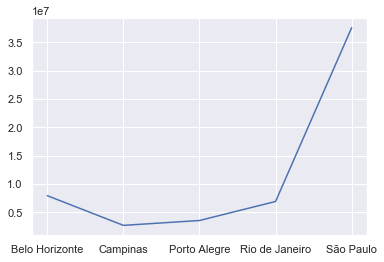

In [24]:
plt.plot(data.groupby('city').agg('sum')['total'])

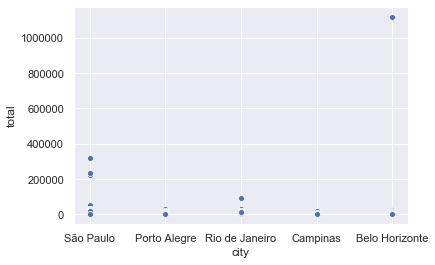

In [25]:
sns.scatterplot(x='city',y='total',data=data)

In [26]:
data.head(1)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618,0,0,0,1


In [27]:
num_features=list(set(data._get_numeric_data().columns)-set(['city','property_tax','fire_insurance','rent_amount','total']))

In [28]:
len(num_features)

12

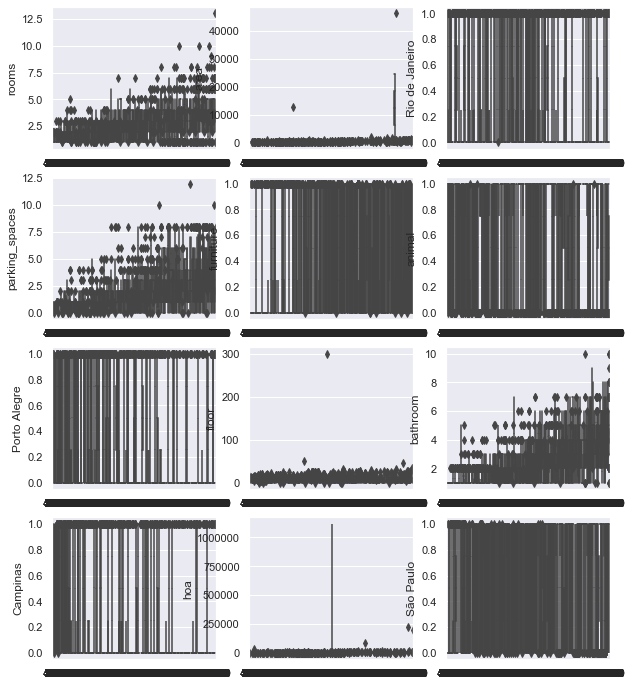

In [29]:
fig, axes=plt.subplots(4,3,figsize=(10,12))

for idx,feature in enumerate(num_features):
    ax=axes[int(idx/3),idx%3]
    sns.boxplot(x='rent_amount', y= feature, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feature)

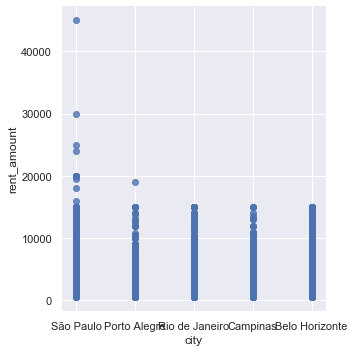

In [30]:

sns.lmplot(data=data, x='city', y='rent_amount', fit_reg=False)

In [31]:
data.head(1)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618,0,0,0,1


1. Viz
2. Tester les suppositions
3. Reformuler le resultats du model final: Null Hypothesis
4. Presentation

